## EDA

## Image Analysis

In [13]:
import pandas as pd

In [2]:
performance_df = pd.read_csv('../data/performance_data.csv')
performance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [3]:
performance_df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [30]:
performance_df.loc[11].preview_link

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/adunit-chevy-hotspot-cpe-mpu/6e61b3065a836ba4585e/index.html'

In [31]:
performance_df.loc[11]

game_id                              adunit-chevy-hotspot-cpe-mpu
preview_link    https://s3.us-east-1.amazonaws.com/a.futureadl...
ER                                                       0.068177
CTR                                                      0.000071
Name: 11, dtype: object

In [32]:
performance_df.loc[10]

game_id                          bcc5ae4665b6b8c2ff25dfdc65fbc65a
preview_link    https://s3.us-west-1.amazonaws.com/a.futureadl...
ER                                                       0.127765
CTR                                                      0.109569
Name: 10, dtype: object

In [33]:
performance_df.loc[10].preview_link

'https://s3.us-west-1.amazonaws.com/a.futureadlabs.com-us-west-1-backup/us-west-1/games/bcc5ae4665b6b8c2ff25dfdc65fbc65a/a44f36bebcd4015d97c1/index.html'

#### Position Extraction

In [34]:
from typing import Tuple
import cv2
import matplotlib.pyplot as plt
from typing import Tuple

In [35]:
def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: Tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        # Calculate additional features
        size = (width, height)
        ratio = width / height
        total_covered_area = width * height

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        #return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}
        # Return the extracted features
        return {
            f'{prefix}top_left_pos': top_left,
            f'{prefix}bottom_right_pos': bottom_right,
            f'{prefix}size': size,
            f'{prefix}ratio': ratio,
            f'{prefix}total_covered_area': total_covered_area
        }

    except cv2.error as err:
        print(err)

{'eng_top_left_pos': (151, 774),
 'eng_bottom_right_pos': (450, 850),
 'eng_size': (299, 76),
 'eng_ratio': 3.9342105263157894,
 'eng_total_covered_area': 22724}

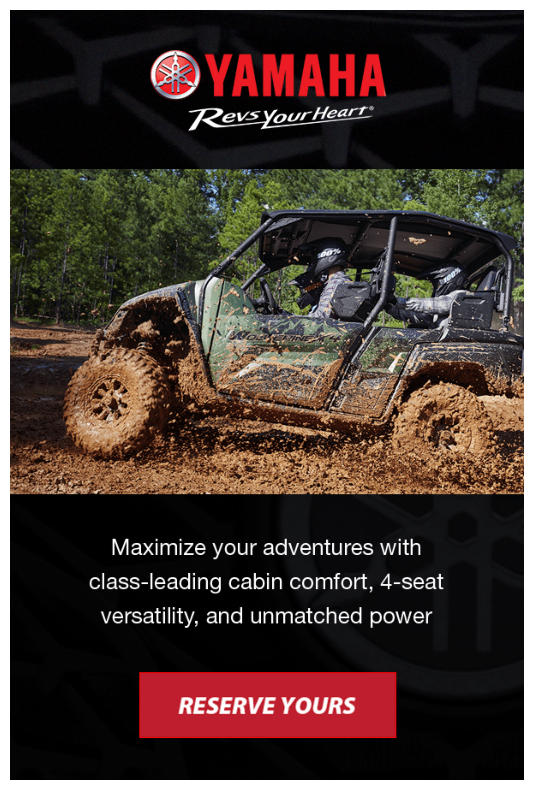

In [36]:
locate_image_on_image(
    '../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/cta.png', '../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/_preview.png', prefix='eng_', visualize=True)


In [51]:
df_sorted = performance_df.sort_values(by='CTR', ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head()

,game_id,preview_link,ER,CTR
0,6befe54086758294b47addf0c12052a7,https://s3.ap-east-1.amazonaws.com/a.futureadl...,0.327068,0.297410
1,f033db746b20e747ee528caa07f0b2de,https://s3.ap-east-1.amazonaws.com/a.futureadl...,0.306202,0.293282
2,eb641577b39bf60665e3130ac0d4e301,https://s3.ap-east-1.amazonaws.com/a.futureadl...,0.360153,0.280241
3,79a672060e901ce418230c3959619cca,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.297365,0.236056
4,77af46ea55c251a18213104bd760d1d2,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.268383,0.227826


In [52]:
df_sorted = performance_df.sort_values(by='ER', ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted.head()

,game_id,preview_link,ER,CTR
0,0792c911c288bd241c1e2a2b64bce488,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.524498,0.025249
1,015efcdd8de3698ffc4dad6dabd6664a,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.446696,0.034950
2,07f93a53c25007301d276ec20e7be491,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.440421,0.020432
3,adunit-mouser-user-choice-flight4-uk-cpe-mob,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.439367,0.160604
4,6a3dbf08b82e45b3f3e79844f3a9aa18,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.429701,0.165093


In [53]:
df_sorted.loc[0].preview_link

'https://s3.eu-west-1.amazonaws.com/a.futureadlabs.com/games/0792c911c288bd241c1e2a2b64bce488/36e2dc626f352064ffc5/index.html'

In [54]:
df_sorted.loc[0]

game_id                          0792c911c288bd241c1e2a2b64bce488
preview_link    https://s3.eu-west-1.amazonaws.com/a.futureadl...
ER                                                       0.524498
CTR                                                      0.025249
Name: 0, dtype: object

{'eng_top_left_pos': (0, 0),
 'eng_bottom_right_pos': (600, 900),
 'eng_size': (600, 900),
 'eng_ratio': 0.6666666666666666,
 'eng_total_covered_area': 540000}

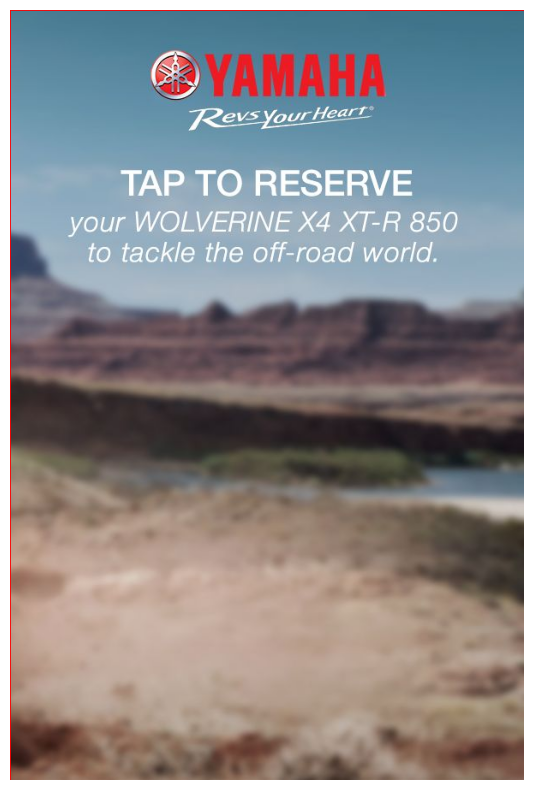

In [60]:
locate_image_on_image(
    '../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/game_1.png', '../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/landing.jpg', prefix='eng_', visualize=True)

#### Color Identification

In [61]:
! pip install extcolors
! pip install colormap

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.8/196.8 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for colormap: filename=colormap-1.0.6-py3-none-any.whl size=15820 sha256=3de0dfbcb6f887f2de71a026649dde8c0f846b28d994b36b0a8722ddaccffbc1
  Stored in directory: /home/daisy_cherono/.cache/pip/wheels/4a/98/c5/b27432980a873558658714878624d1b2cd464c2e236a8706e2
  Created wheel for line-profiler: filename=line_profiler-4.1.3-cp38-cp38-linux_aarch64.whl size=718574 sha256=0fffb3ff88599a4e5b1317c9ae84be2900875c4e12b2de91cd816dd477f42955
  Stored in directory: /home/daisy_cherono/.cache/pip/wheels/1d/be/6c/a3d6deb49ca47fce635cb7797114d3a52746b96bf9b33fc43f

In [63]:
import extcolors
from colormap import rgb2hex
from PIL import Image

In [64]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 2,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df


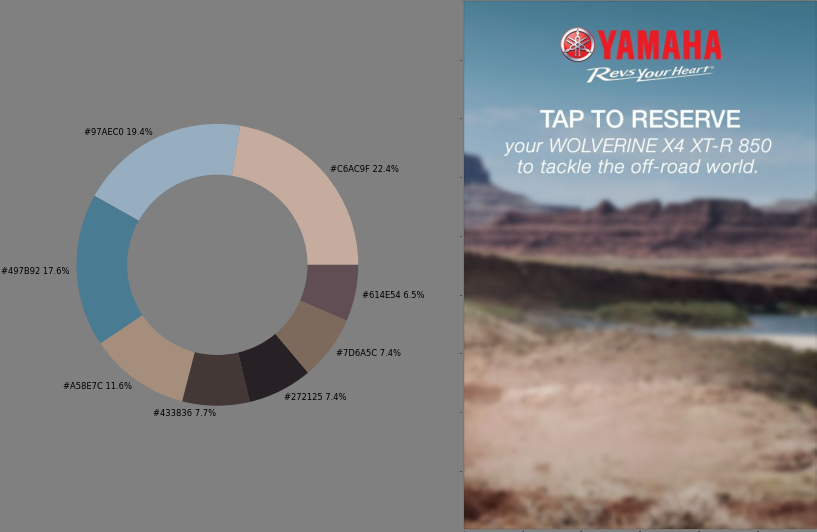

,c_code,rgb,occurrence
0,#C6AC9F,"(198, 172, 159)",110351
1,#97AEC0,"(151, 174, 192)",95566
2,#497B92,"(73, 123, 146)",86462
3,#A58E7C,"(165, 142, 124)",56890
4,#433836,"(67, 56, 54)",37921
5,#272125,"(39, 33, 37)",36583
6,#7D6A5C,"(125, 106, 92)",36391
7,#614E54,"(97, 78, 84)",31842


In [65]:
identify_color_composition('../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/landing.jpg',tolerance=12,limit=8, visualize=True)

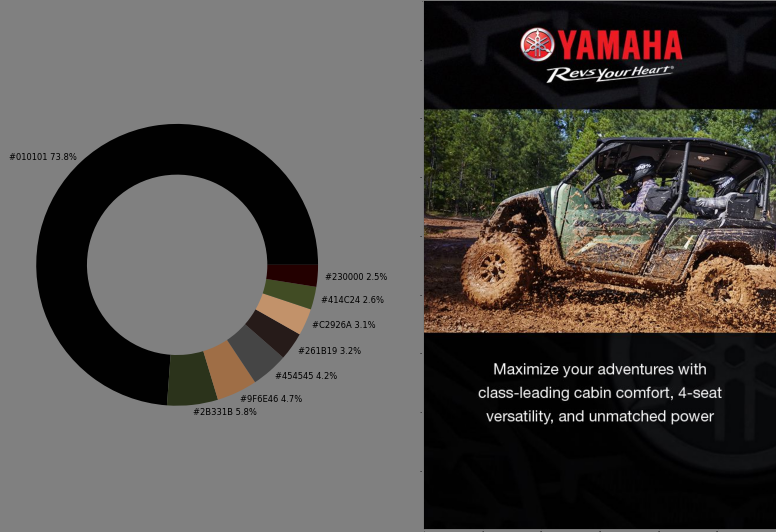

,c_code,rgb,occurrence
0,#010101,"(1, 1, 1)",325441
1,#2B331B,"(43, 51, 27)",25711
2,#9F6E46,"(159, 110, 70)",20504
3,#454545,"(69, 69, 69)",18630
4,#261B19,"(38, 27, 25)",14221
5,#C2926A,"(194, 146, 106)",13630
6,#414C24,"(65, 76, 36)",11532
7,#230000,"(35, 0, 0)",11035


In [67]:
identify_color_composition('../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/endframe.jpg',tolerance=12,limit=8, visualize=True)

### Text Analysis
#### Text Summarization

In [70]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [77]:
def convert_hex_to_rgb(hex_color: str, normalize: bool = True) -> List[str]:
    """Converts a HEX color to a RGB color

    Args:
        hex_color (str): HEX color code to convert
        normalize (bool, optional): Choice to normalize calculated rgb values . Defaults to True.

    Returns:
        List[str]: List of RGB values in order, normalized or not.
    """
    colors = hex_color[1:]

    # Convert HEX color values to RGB Values
    colors = [int(colors[0:2], base=16),  # RED
              int(colors[2:4], base=16),  # GREEN
              int(colors[4:6], base=16)]  # BLUE

    # Normalize RGB values
    if normalize:
        colors = [color / 255 for color in colors]

    return colors

def get_luminance(hex_color: str) -> float:
    """Calculates the luminance of a given HEX color

    Args:
        hex_color (str): HEX color code to calculate luminance for

    Returns:
        float: luminance value of color
    """
    colors = convert_hex_to_rgb(hex_color)

    luminance = colors[0] * 0.2126 + colors[1] * 0.7152 + colors[2] * 0.0722

    return luminance

def fix_image_background(image_path: str):
    identified_colors = identify_color_composition(image_path)
    text_color = identified_colors['c_code'].to_list()[0]
    text_color_rgb = identified_colors['rgb'].to_list()[0]
    luminance = get_luminance(hex_color=text_color)

    if luminance < 140:
        background_color = (255, 255, 255)
    else:
        background_color = (0, 0, 0)

    # Load image
    image = cv2.imread(image_path)

    # Make all perfectly green pixels white
    image[np.all(image != text_color_rgb, axis=-1)] = background_color

    return image

def extract_text(image_path, tesseract_cmd: str = '', fix_background: bool = False):
    # pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
    try:
        if fix_background:
            text = pytesseract.image_to_string(
                fix_image_background(image_path))
        else:
            text = pytesseract.image_to_string(image_path)
        
        return text

    except pytesseract.TesseractNotFoundError:
        raise Exception(
            f'Failure: Tesseract is not installed or not available in the defined path {tesseract_cmd}')

In [78]:
extract_text('../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/landing.jpg')

'«YAMAHA\n\n \n\x0c'

In [79]:
extract_text('')
')

'© YAMAHA\n\nevs YourHeart\n\n \n\nMaximize your adventures with\nclass-leading cabin comfort, 4-seat\nversatility, and unmatched power\n\x0c'

In [76]:
extract_text('../data/Assets/bcc5ae4665b6b8c2ff25dfdc65fbc65a/cta.png')

'RESERVE YOURS\n\x0c'